<a href="https://colab.research.google.com/github/BubbleFish21226/SentenceTransformer/blob/main/SemanticSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

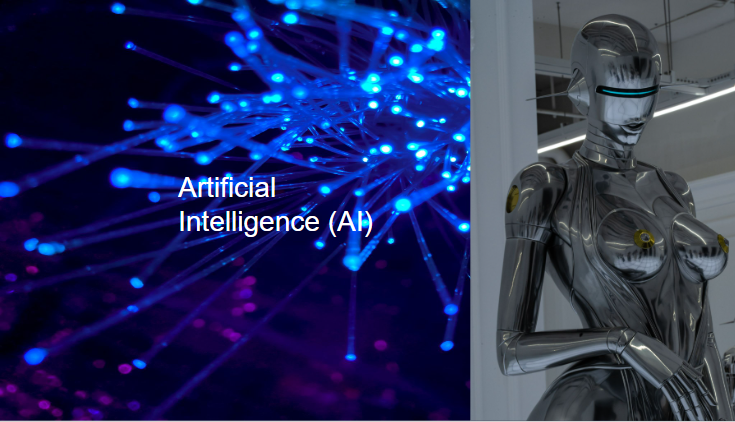

In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#What is Transformer? Autobots, transform and roll out!

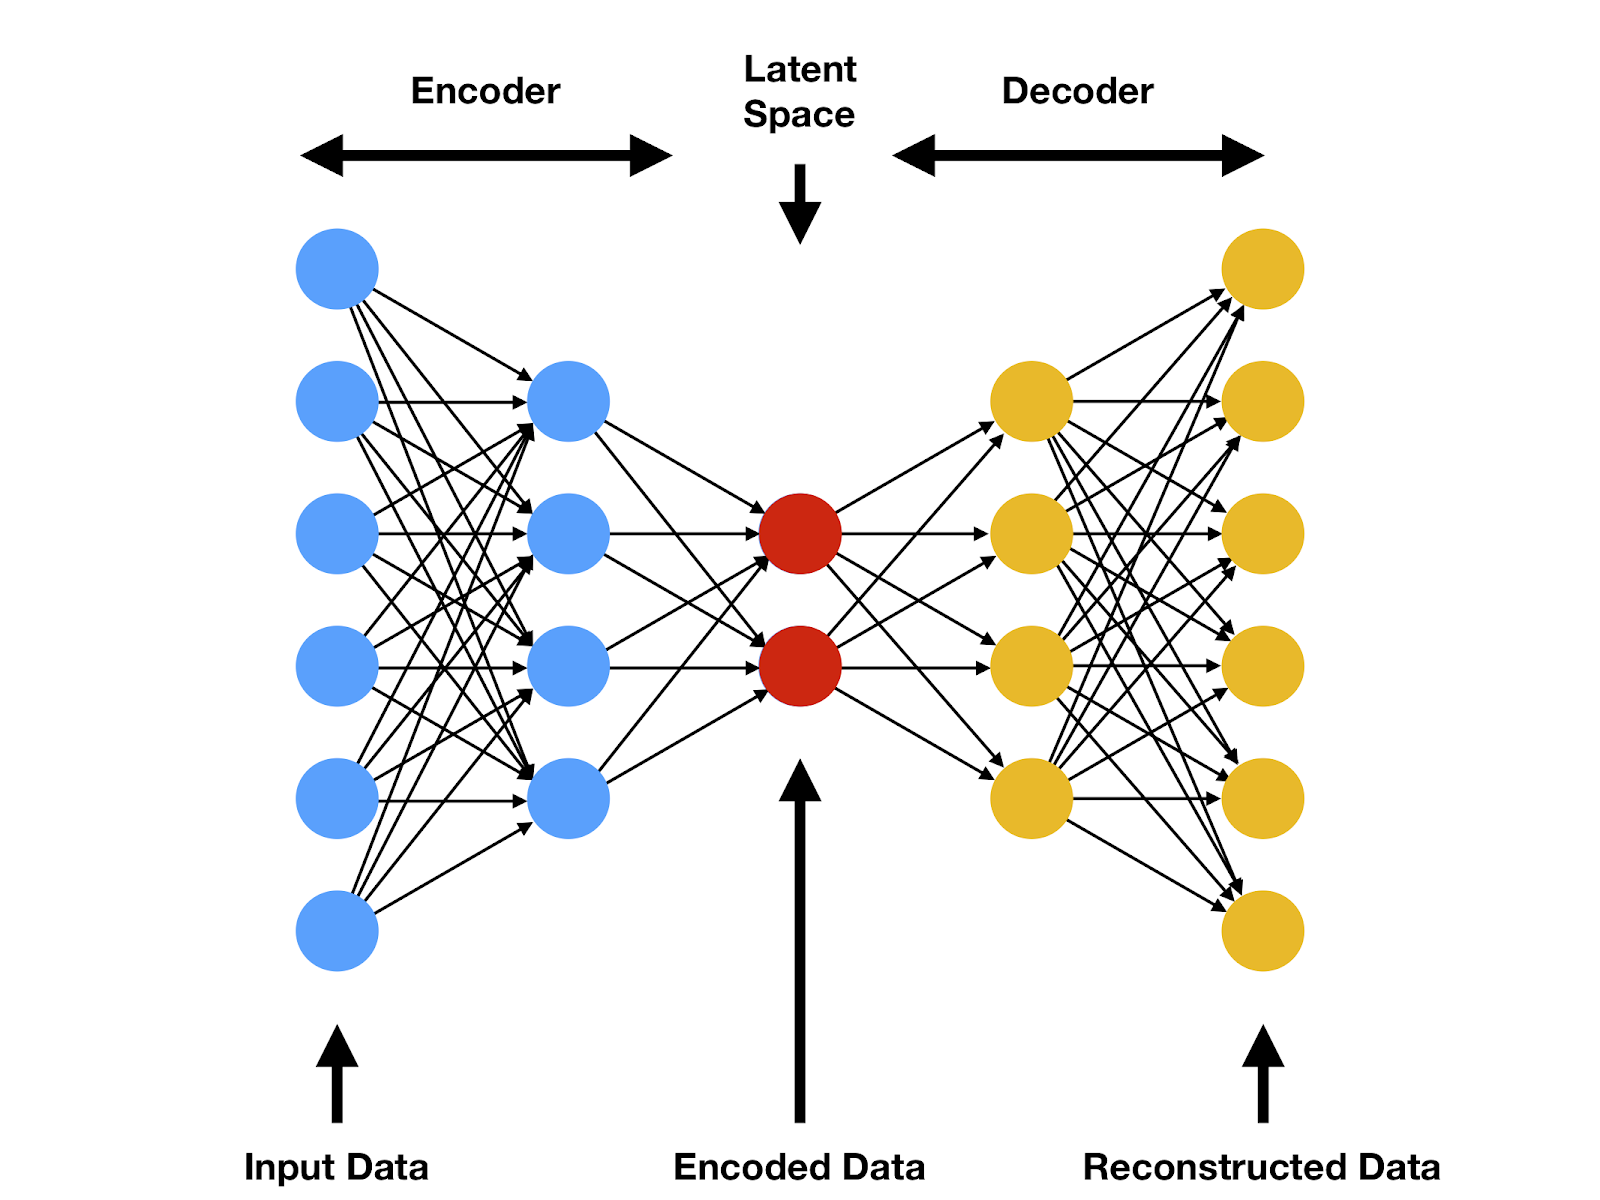

Source: https://ml.berkeley.edu/blog/posts/vq-vae/

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# More models from : https://www.sbert.net/docs/pretrained_models.html
embedder = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
# Corpus with example sentences
corpus = ['The most important key to achieving success is to decide upon your goal, get started, take action, keep moving forward',
          'Every next level of your life will demand a different version of you',
          'For your peace of mind, do not try to understand everything',
          'Believe in yourself',
          'Do not let anyone control how you feel. They do not matter'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

In [ ]:
# print (corpus_embeddings.size())
print (corpus_embeddings[1])

tensor([-3.3035e-02, -1.0015e-02,  7.3373e-02, -2.8673e-02,  9.5647e-03,
        -7.6390e-02,  3.4972e-02, -7.5830e-02,  2.8391e-02, -4.6334e-02,
         5.1416e-03, -5.9215e-02, -1.6767e-02, -7.4654e-03,  9.2788e-02,
        -1.5256e-02, -4.3774e-02, -5.9033e-03, -4.1694e-02,  3.7649e-02,
        -4.5660e-02,  2.3869e-02,  2.7889e-02,  9.0766e-03, -8.8070e-02,
         1.7674e-02, -1.8617e-02, -1.2465e-02,  1.9474e-02, -1.0280e-02,
         2.4590e-02,  3.1562e-02, -4.0509e-02, -1.3738e-02, -5.9201e-02,
        -3.0492e-02, -1.0223e-01,  2.0484e-02,  5.3801e-02,  5.0621e-02,
        -1.7234e-02, -1.3834e-02, -3.8387e-02, -2.3648e-02, -4.8866e-02,
        -5.4556e-02, -4.3809e-02, -1.0967e-02,  3.2506e-02, -2.6163e-03,
        -7.6077e-02, -1.0517e-01, -2.8245e-02, -4.3579e-02,  5.4945e-02,
         6.8384e-02,  3.4639e-02,  1.5433e-01,  6.3262e-02,  5.2987e-02,
        -1.1951e-01, -3.0136e-03,  1.9754e-02, -4.7323e-03,  6.7867e-02,
         1.9466e-02,  1.7409e-02,  4.2298e-03, -5.5

In [ ]:
# query = 'I am going crazy trying to learn everything'
query = 'I am going crazy trying to learn advanced space engineering'
# query = 'The secret of becoming rich is want to get rich and do something about it'
query_embedding = embedder.encode (query, convert_to_tensor=True)

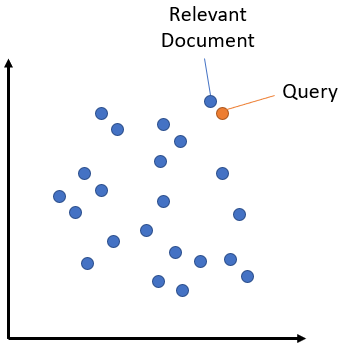

Source : https://www.sbert.net/examples/applications/semantic-search/README.html

In [ ]:
print (query_embedding.size())

torch.Size([384])


In [ ]:
hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=2)
hits = hits[0]      #Get the hits for the first query
for hit in hits:
    print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

For your peace of mind, do not try to understand everything (Score: 0.2409)
The most important key to achieving success is to decide upon your goal, get started, take action, keep moving forward (Score: 0.2117)
